In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

### Categorical Distribution
- Expansion of Bernoulli dist
- Bernoulli dist's outcome can be 0 and 1.ex) coin toss -> Head and Tail
- What if the case of dice toss? -> use categorical dist
- Categorical dist if radom variable returns categorical scalar value (1,2,3,..,6)
- but, generally, it returns n-dimension-form such like below example.
    - x=1 -> x=(1,0,0,0,0,0)
    - x=2 -> x=(0,1,0,0,0,0) ...
    - x=6 -> x=(0,0,0,0,0,1) this method is called `One-Hot-Coding`
- Generalization of one-hot-coding : x=(x_1,x_2,...,x_6) in dice case.
- there are constraint allocating x,theta
    - x_i can be 0 and 1 (for one hot coding), sum of x_i is always '1'
    - theta = (theta_1,..,theta_k), sum of theta_k is always '1' 
- Expression of Categorical distribution: `Cat(x_1,...,x_k ; theta_k,...,theta_k)`
- Cat(x;theta) : there is only one parameter 'theta'
- Cat(x;theta) = `theta_1^x_1 *...*theta_k^x_k` due to one-hot-coding
    - x_i means not scalar value, n-dimension vector!!! 
    - ex) x_6 = (0,0,0,0,0,1)
- Moment of Categorical Distribution:
    - first moment(expectation) : E[x_k] = `theta_k` 
        - expectation of outcome 1 in dice toss trial is 1/6
    - second moment(variance) : Var(x_k) = `theta_k(1-theta_k)`
        - variation of outcome 1 in dice toss trial is 1/6(1-1/6)

scipy에서는 카테고리 분포를 위한 클래스를 별도로 제공하고 있지 않기 때문에 multinomial 클래스에서 N 모수를 1로 두어서 계산합니다.

In [1]:
theta = np.array([1/6]*6)
rv = sp.stats.multinomial(1,theta)
rv

In [2]:
xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)
# Convert categorical variable into dummy/indicator variables
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


<IPython.core.display.Javascript object>


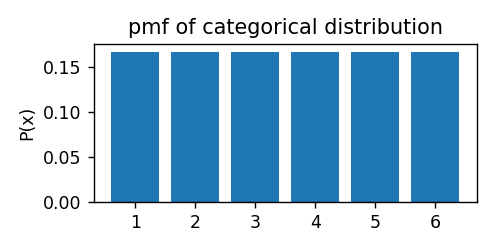

In [6]:
plt.figure(figsize=(4,2))
plt.bar(xx,rv.pmf(xx_ohe))
plt.ylabel('P(x)')
plt.title('pmf of categorical distribution')
plt.tight_layout()
plt.show()

In [8]:
xx= rv.rvs(100, random_state=0)
xx[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])

In [11]:
y=xx.sum(axis=0)/len(xx)
y

array([0.14, 0.19, 0.11, 0.2 , 0.16, 0.2 ])

<IPython.core.display.Javascript object>


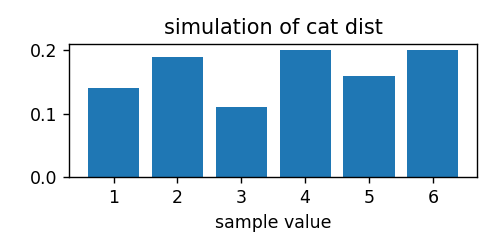

In [12]:
plt.figure(figsize=(4,2))
plt.bar(np.arange(1,7),y)
plt.title('simulation of cat dist')
plt.xlabel('sample value')
plt.tight_layout()
plt.show()

In [26]:
df=pd.DataFrame({'theory':rv.pmf(xx_ohe),'simulation':y},index=np.arange(1,7))
df

,simulation,theory
1,0.14,0.166667
2,0.19,0.166667
3,0.11,0.166667
4,0.20,0.166667
5,0.16,0.166667
6,0.20,0.166667


In [27]:
df=df.stack()
# Pivot a level of the (possibly hierarchical) column labels, returning a
# DataFrame (or Series in the case of an object with a single level of
df=df.reset_index()
# For DataFrame with multi-level index, return new DataFrame with
# labeling information in the columns under the index names, defaulting
df.columns=['sample','type','ratio']
df.pivot('sample','type','ratio')
df

,sample,type,ratio
0,1,simulation,0.140000
1,1,theory,0.166667
2,2,simulation,0.190000
3,2,theory,0.166667
4,3,simulation,0.110000
5,3,theory,0.166667
6,4,simulation,0.200000
7,4,theory,0.166667
8,5,simulation,0.160000
9,5,theory,0.166667


<IPython.core.display.Javascript object>


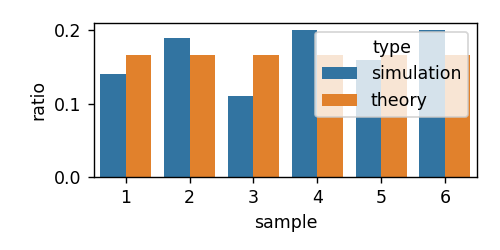

In [29]:
plt.figure(figsize=(4,2))
sns.barplot(x='sample',y='ratio',hue='type',data=df)
plt.tight_layout()
plt.show()

### Multinomial Distribution
- Multiple benoulli trial = follows Binomial distribution
- Multiple categorical tiral = follows Multinomial distribution
- Mu(x;N,theta) = `N_Combination_x1,x_2,..,x_k theta_1^x_1 *theta_2^x_2,..,theta_k^x_k`
- Moment of Multinomial Distribution
    - first moment(expectation): E[x_k] = `N * theta_k`
    - second moment(variance): = `N*theta_k(1-theta_k)`

In [30]:
N = 30
theta=[0,0,0.1,0.2,0.3,0.4]
rv=sp.stats.multinomial(N,theta)
rv

In [40]:
x=rv.rvs(100,random_state=0)
x[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

<IPython.core.display.Javascript object>


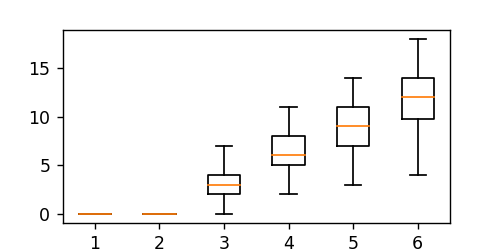

In [33]:
plt.figure(figsize=(4,2))
plt.boxplot(x)
plt.show()

In [44]:
df=pd.DataFrame(x).stack().reset_index()
df.columns=['trial','class','binomial']
df['class']+=1
df['trial']+=1
df[:6]

,trial,class,binomial
0,1,1,0
1,1,2,0
2,1,3,3
3,1,4,6
4,1,5,9
5,1,6,12
